# More PyTorch concepts

## Init, helpers, utils, ...

In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

from IPython.core.debugger import set_trace

%matplotlib inline

In [2]:
from ppt.utils import attr

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

# Dataset
`Dataset` gives you information about the number of samples (implement `__len__`) and gives you the sample at a given index (implement `__getitem__`.
It's a nice and simple abstraction to work with data.

In [4]:
from ppt.utils import DogsCatsDataset

In [5]:
train_ds = DogsCatsDataset("../data/raw", "sample/train")

Loading data from ../data/raw\dogscats\sample/train.


In [19]:
#!tree -d ../data/raw/dogscats/
!tree ../data/raw/dogscats

Folder PATH listing for volume OS
Volume serial number is 2092-F779
C:\USERS\RYAN\DOCUMENTS\GITHUB\PYTORCH_TUTORIAL\DATA\RAW\DOGSCATS
ÃÄÄÄmodels
ÃÄÄÄsample
³   ÃÄÄÄtrain
³   ³   ÃÄÄÄcats
³   ³   ÀÄÄÄdogs
³   ÀÄÄÄvalid
³       ÃÄÄÄcats
³       ÀÄÄÄdogs
ÃÄÄÄtest1
ÃÄÄÄtrain
³   ÃÄÄÄcats
³   ÀÄÄÄdogs
ÀÄÄÄvalid
    ÃÄÄÄcats
    ÀÄÄÄdogs


In [7]:
train_ds

Dataset DogsCatsDataset
    Number of datapoints: 16
    Root Location: ../data/raw\dogscats\sample/train
    Transforms (if any): None
    Target Transforms (if any): None

In [8]:
# the __len__ method
len(train_ds)

16

In [9]:
# the __getitem__ method
train_ds[0]

(<PIL.Image.Image image mode=RGB size=499x375 at 0x19F4F2CA198>, 0)

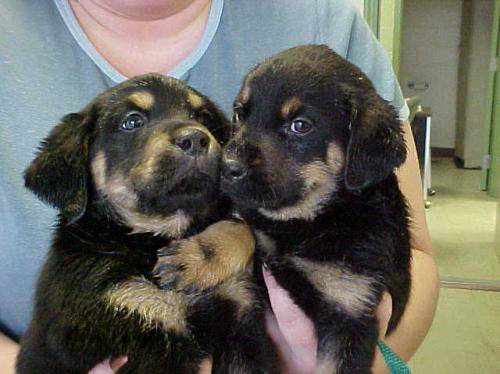

In [10]:
train_ds[14][0]

Optionally, datasets offer some convenience functions and attributes.
This is not enforced by the interface

In [11]:
train_ds.classes

['cats', 'dogs']

In [12]:
train_ds.class_to_idx

{'cats': 0, 'dogs': 1}

In [13]:
train_ds.imgs

[('../data/raw\\dogscats\\sample/train\\cats\\cat.11737.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.2266.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.2921.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.3570.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.394.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.4600.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.4865.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\cats\\cat.9021.jpg', 0),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.1402.jpg', 1),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.1614.jpg', 1),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.2423.jpg', 1),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.6391.jpg', 1),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.6768.jpg', 1),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.8091.jpg', 1),
 ('../data/raw\\dogscats\\sample/train\\dogs\\dog.8643.jpg', 1),
 ('../data/raw\\dogscats\

0 cats


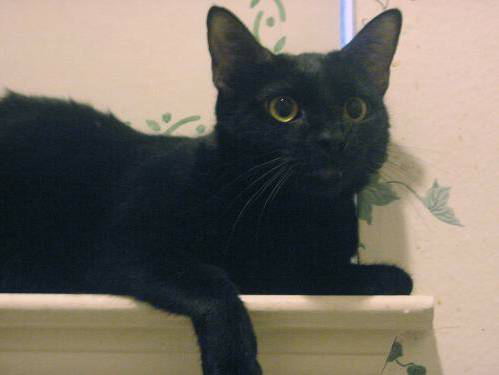

0 cats


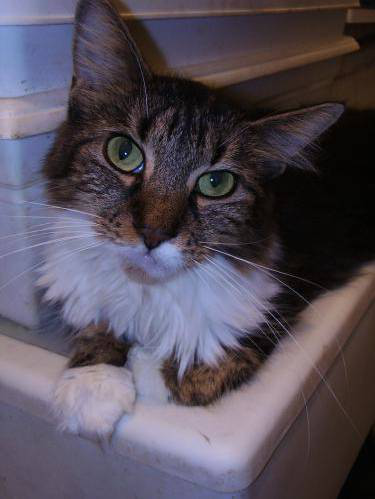

0 cats


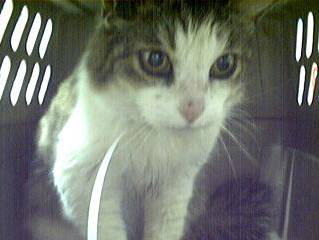

0 cats


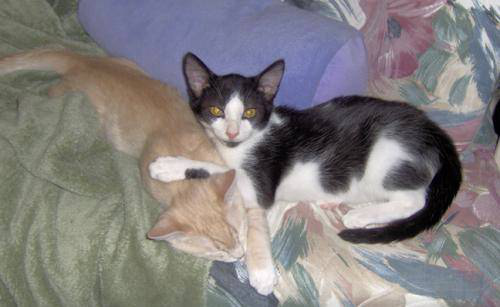

0 cats


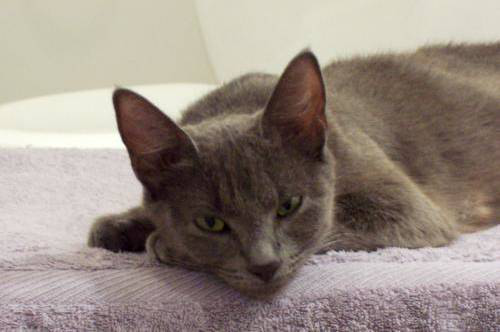

0 cats


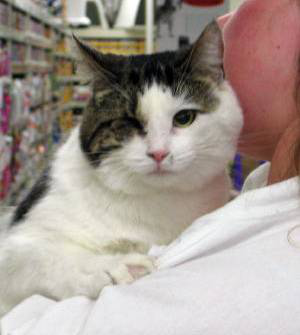

0 cats


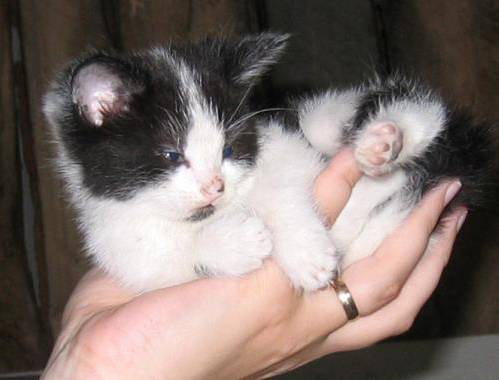

0 cats


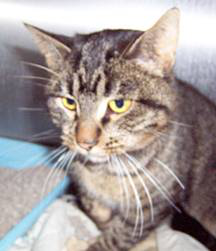

1 dogs


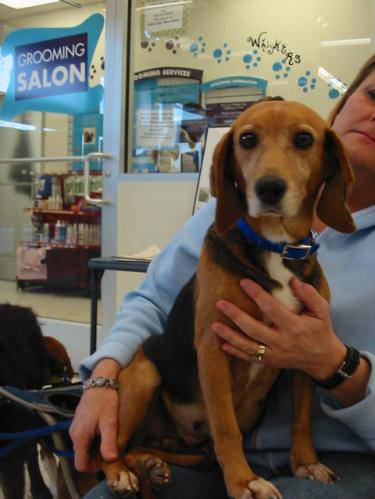

1 dogs


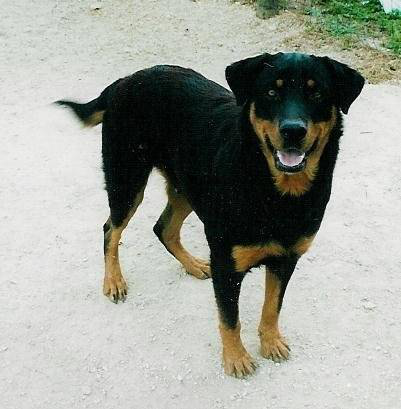

1 dogs


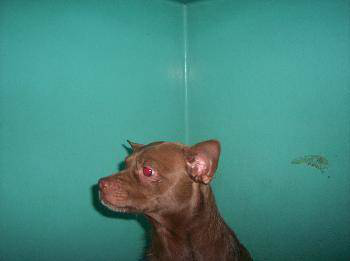

1 dogs


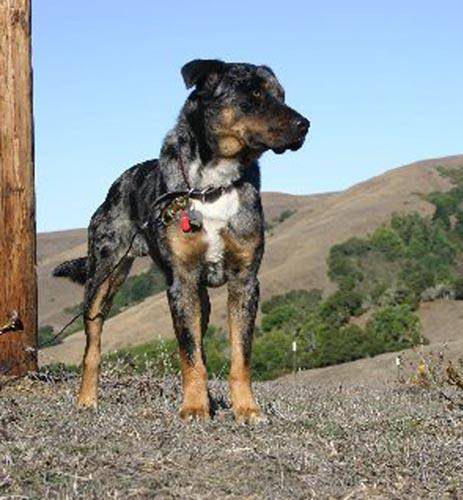

1 dogs


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [14]:
for img, label_id in train_ds:
    print(label_id, train_ds.classes[label_id])
    display(img)

# Transforms

Common image transformation that can be composed/chained.

In [23]:
from torchvision import transforms

IMG_SIZE = 224
_mean = [0.485, 0.456, 0.406]
_std = [0.229, 0.224, 0.225]


trans = transforms.Compose([
    transforms.RandomCrop(IMG_SIZE),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(.3, .3, .3),
    transforms.ToTensor(),
    transforms.Normalize(_mean, _std),
])

trans(train_ds[13][0])

tensor([[[-0.5938, -0.8164, -0.9020,  ..., -0.5938,  1.1529,  1.8379],
         [-0.8678, -0.9534, -0.9877,  ..., -0.6794,  1.4098,  1.7694],
         [-0.9192, -1.2274, -1.2617,  ..., -0.5253,  0.7762,  1.8722],
         ...,
         [ 0.6563,  0.5878,  0.5707,  ...,  0.4337,  0.4337,  0.4337],
         [ 0.6049,  0.5536,  0.5364,  ...,  0.4166,  0.4166,  0.4166],
         [ 0.6049,  0.5193,  0.5022,  ...,  0.4166,  0.4337,  0.4337]],

        [[-0.6001, -0.6702, -0.7577,  ..., -0.4426,  1.3256,  2.0434],
         [-0.8803, -0.8627, -0.8978,  ..., -0.6001,  1.5532,  1.9034],
         [-0.9153, -1.1253, -1.1779,  ..., -0.4426,  0.9055,  2.0084],
         ...,
         [ 0.8004,  0.8880,  0.8704,  ...,  0.6254,  0.6254,  0.6254],
         [ 0.7829,  0.8529,  0.8354,  ...,  0.6078,  0.6078,  0.6078],
         [ 0.7829,  0.8179,  0.8004,  ...,  0.6078,  0.6254,  0.6254]],

        [[-0.4624, -0.3753, -0.4798,  ..., -0.5670,  1.1237,  1.8034],
         [-0.6018, -0.7238, -0.7761,  ..., -0

Ref:
- https://pytorch.org/docs/stable/torchvision/transforms.htm
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://github.com/mdbloice/Augmentor
- https://github.com/aleju/imgaug

Shout-out:
- Hig performance image augmentation with pillow-simd: https://github.com/uploadcare/pillow-simd and http://python-pillow.org/pillow-perf/
- [Improving Deep Learning Performance with AutoAugment](https://ai.googleblog.com/2018/06/improving-deep-learning-performance.html) ([paper](https://arxiv.org/abs/1805.09501) | [pytorch implementation](https://github.com/DeepVoltaire/AutoAugment))

# Dataloader
The `DataLoader` class offers batch loading of datasets with multi-processing and different sample strategies.

In [24]:
from torch.utils.data import DataLoader

DataLoader?

Init signature: DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, batch_sampler=None, num_workers=0, collate_fn=<function default_collate at 0x0000019F4F260C80>, pin_memory=False, drop_last=False, timeout=0, worker_init_fn=None)
Docstring:     
Data loader. Combines a dataset and a sampler, and provides
single- or multi-process iterators over the dataset.

Arguments:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler, optional): defines the strategy to draw samples from
        the dataset. If specified, ``shuffle`` must be False.
    batch_sampler (Sampler, optional): like sampler, but returns a batch of
        indices at a time. Mutually exclusive with :attr:`batch_size`,
        :attr:`shuffle`, :attr:`sampler`, and :attr:`drop_las

In [25]:
train_dl = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4)

train_iter = iter(train_dl)
X, y = next(train_iter)

TypeError: Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 232, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 232, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "C:\ProgramData\Anaconda3\lib\site-packages\torch\utils\data\dataloader.py", line 234, in default_collate
    raise TypeError((error_msg.format(type(batch[0]))))
TypeError: batch must contain tensors, numbers, dicts or lists; found <class 'PIL.Image.Image'>


In [26]:
train_ds = DogsCatsDataset("../data/raw", "sample/train", transform=trans)
train_dl = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4)

Loading data from ../data/raw\dogscats\sample/train.


In [31]:
train_iter = iter(train_dl)
X, y = next(train_iter)

In [32]:
print("X:", X.shape)
print("y:", y.shape)

X: torch.Size([2, 3, 224, 224])
y: torch.Size([2])


# Sampler
`Sampler` define **how** to sample from the dataset.

Examples:
- `SequentialSampler`
- `RandomSamples`
- `SubsetSampler`
- `WeightedRandomSampler`

Write your own by simply implementing `__iter__` to iterate over the indices of the dataset.

Ref:
- https://pytorch.org/docs/stable/data.html#torch.utils.data.sampler.Sampler

In [33]:
torch.utils.data.sampler.SubsetRandomSampler??

Init signature: torch.utils.data.sampler.SubsetRandomSampler(indices)
Source:        
class SubsetRandomSampler(Sampler):
    r"""Samples elements randomly from a given list of indices, without replacement.

    Arguments:
        indices (sequence): a sequence of indices
    """

    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in torch.randperm(len(self.indices)))

    def __len__(self):
        return len(self.indices)
File:           c:\programdata\anaconda3\lib\site-packages\torch\utils\data\sampler.py
Type:           type


# Recap
- Transforms
- Dataset
- DataLoader
- Sampler

**simple but extensible interfaces**

# Exercise: write your own dataset
Extend the `DogsCatsDataset` such that you can specify the size of dataset, i.e. the number of samples.

In [34]:
from torch.utils.data import Dataset


class MyDataSet(Dataset):
    def __init__(self):
        super().__init__()
        
    def __len__(self):
        return 0
    
    def __getitem__(self, idx):
        return None